In [1074]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Import Dataset

In [1075]:
df = pd.read_csv("dataset/loan_data.csv")

In [1076]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [1078]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [1079]:
numerical_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

In [1080]:
categorical_cols = ['quarter', 'department', 'day', 'team']

# Data Cleaning

## Bersihkan Data Duplikat

In [1081]:
df.duplicated().sum()

np.int64(0)

## Bersihkan Nilai Null

In [1082]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Analisis Data Eksploratif

# Korelasi Variabel

## Analisis Korelasi Variabel Kontinu dengan Pearson

In [1083]:
continu_corr = df[numerical_cols].corr(method='pearson')

In [1084]:
continu_corr

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


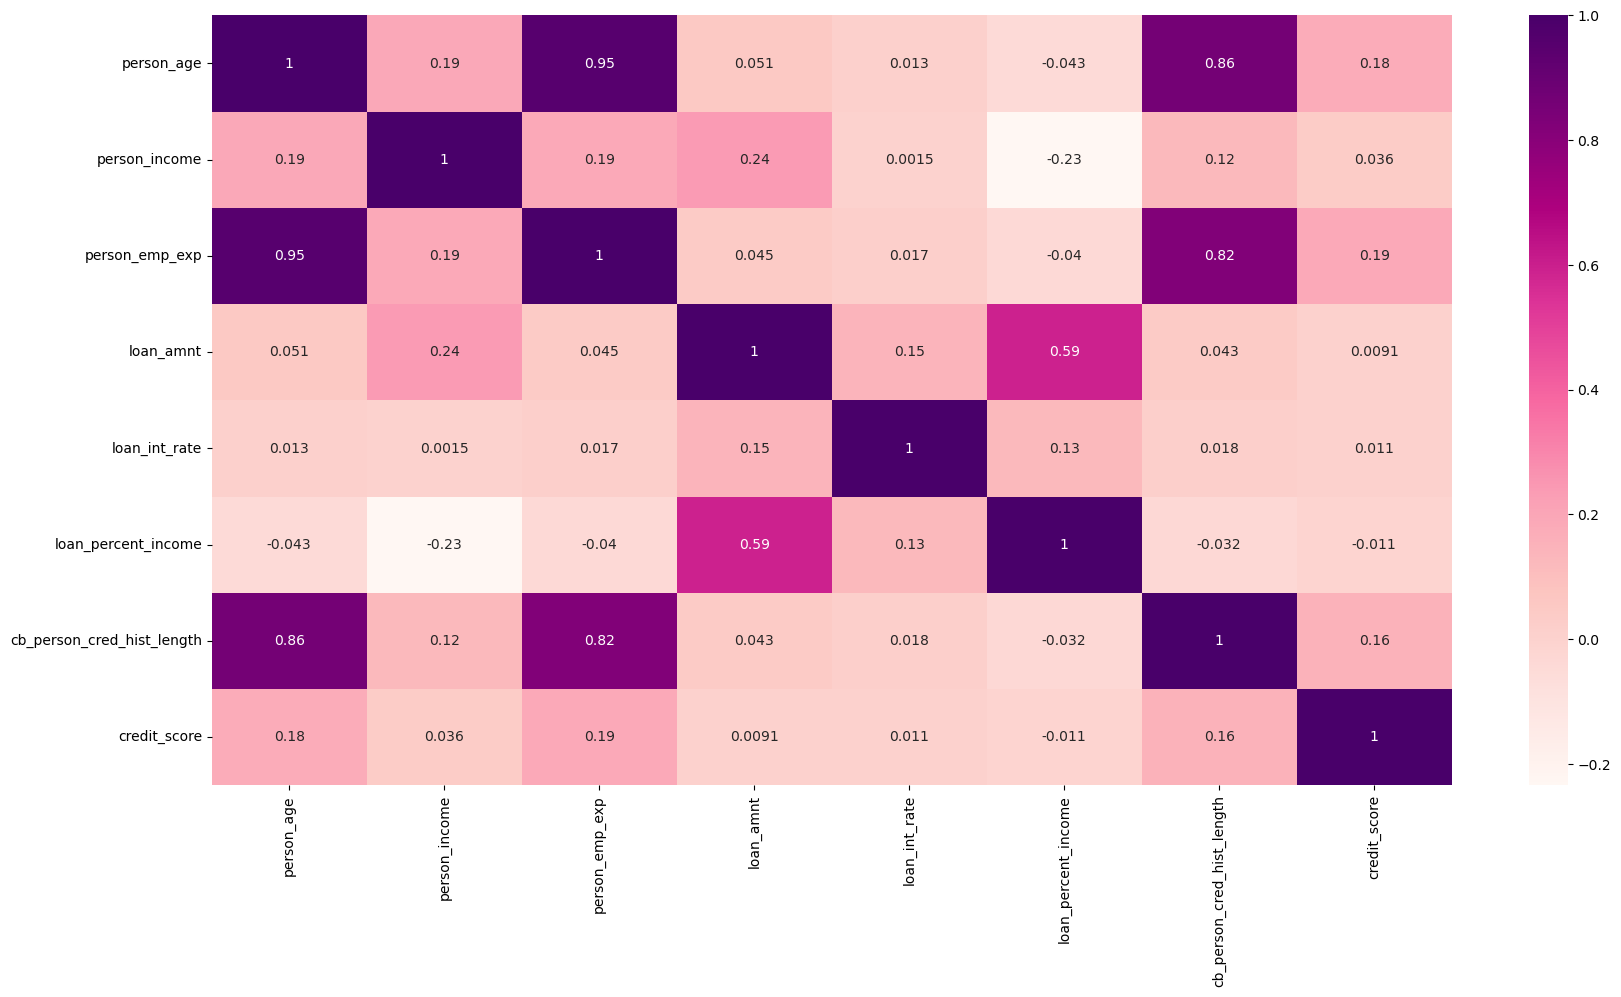

In [1085]:
plt.figure(figsize=(20, 10))
sns.heatmap(continu_corr, annot=True, cmap='RdPu')
plt.show()

## Analisis Korelasi Variabel Nominal dengan Chi2

# Standarisasi dan Cek Outlier


## Standarisasi

## Tindakan Terhadap Outlier

In [1086]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


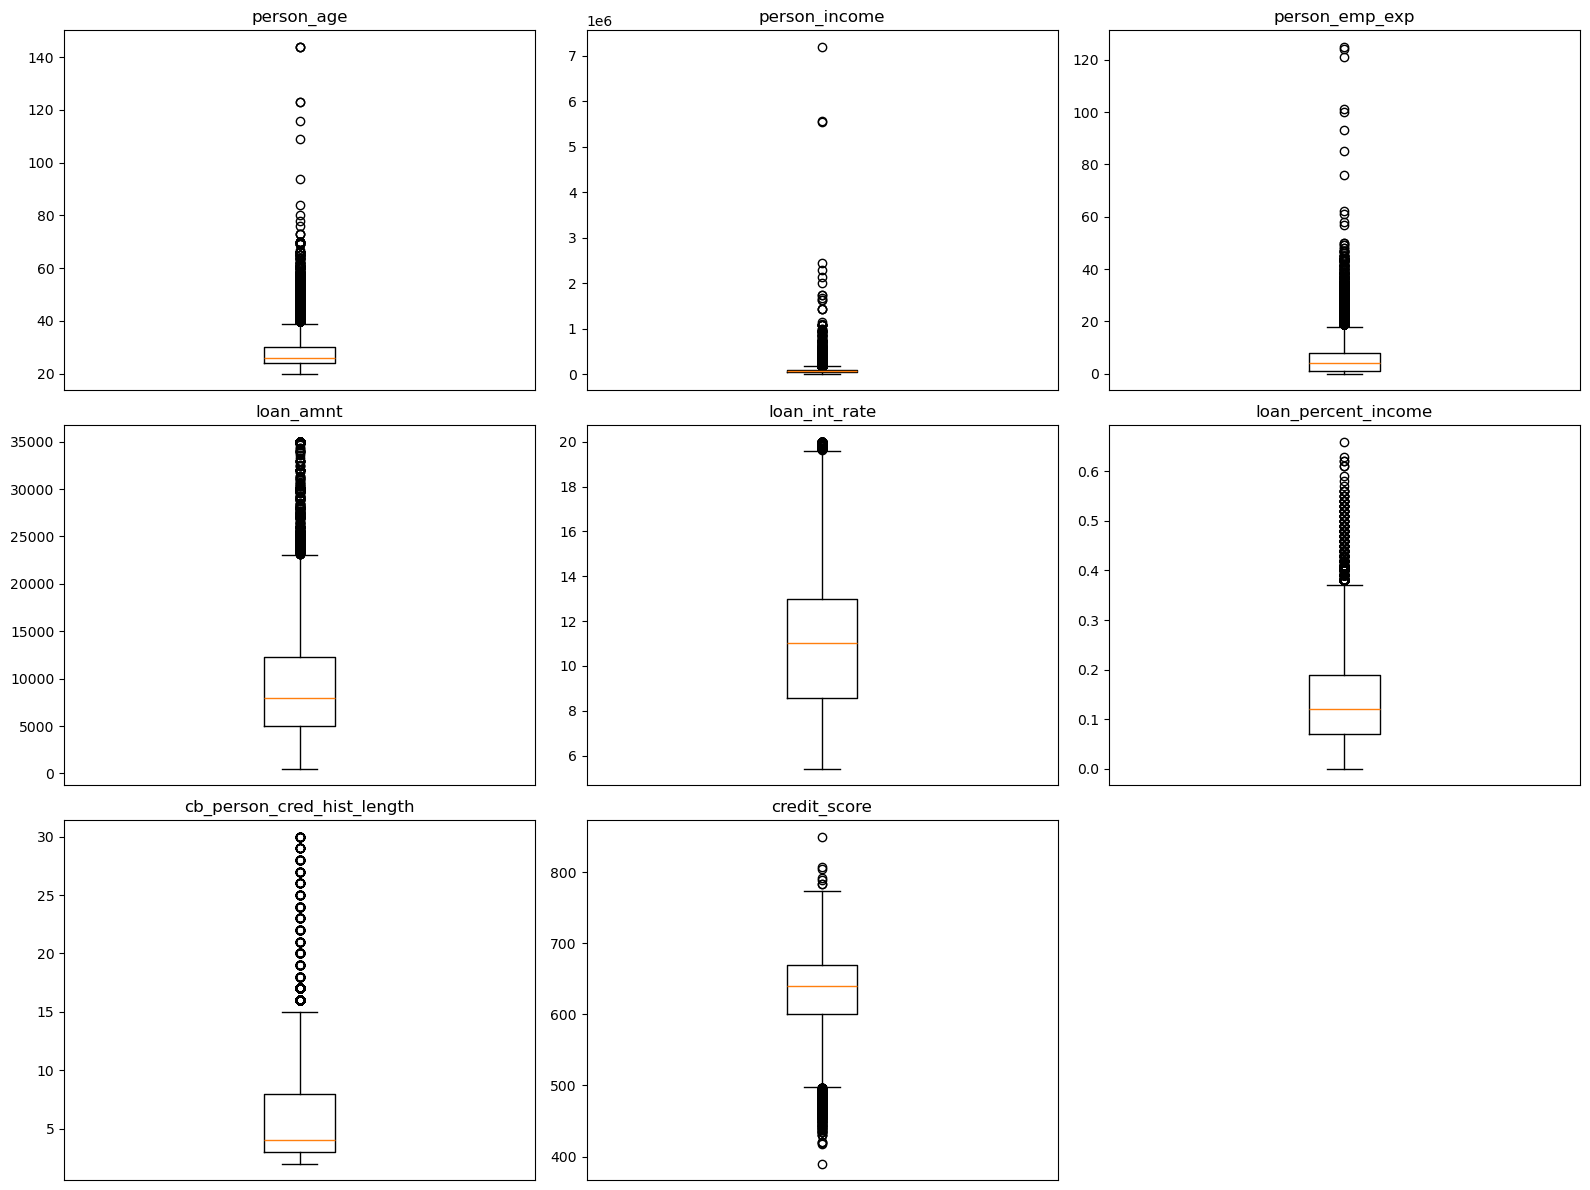

In [1087]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()


Setelah kami visualisaikan menggunakan boxplot, tampak jelas bahwa sebagian besar variabel numerik memiliki nilai yang menyimpang cukup jauh dari mayoritas data. Outlier tersebut muncul pada variabel usia, pendapatan, pengalaman kerja, jumlah pinjaman, hingga skor kredit. Meskipun penyimpangan tersebut dapat mencerminkan kondisi nyata pada sebagian individu, nilai ekstrem yang terlalu jauh dari distribusi utama berpotensi mengganggu proses analisis dan menurunkan kinerja model prediktif. Oleh karena itu, diperlukan langkah penanganan outlier yang tepat agar kualitas data tetap terjaga dan proses pemodelan dapat menghasilkan hasil yang lebih akurat serta dapat diandalkan.

In [1088]:
df_clean = df.copy()

def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)


for col in numerical_cols:
    df_clean[col] = iqr_capping(df_clean[col])


log_cols = ["person_income", "loan_amnt"]
for col in log_cols:
    min_val = df_clean[col].min()
    if min_val <= 0:
        df_clean[col] = df_clean[col] - min_val + 1
    df_clean[col] = np.log(df_clean[col])
print(df_clean.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master      11.183699             0.0   
1        21.0        female      High School       9.415890             0.0   
2        25.0        female      High School       9.428512             3.0   
3        23.0        female         Bachelor      11.286690             0.0   
4        24.0          male           Master      11.099453             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT  10.047290    PERSONAL          16.02   
1                   OWN   6.907755   EDUCATION          11.14   
2              MORTGAGE   8.612503     MEDICAL          12.87   
3                  RENT  10.047290     MEDICAL          15.23   
4                  RENT  10.047290     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.37                         3.0         561.0  

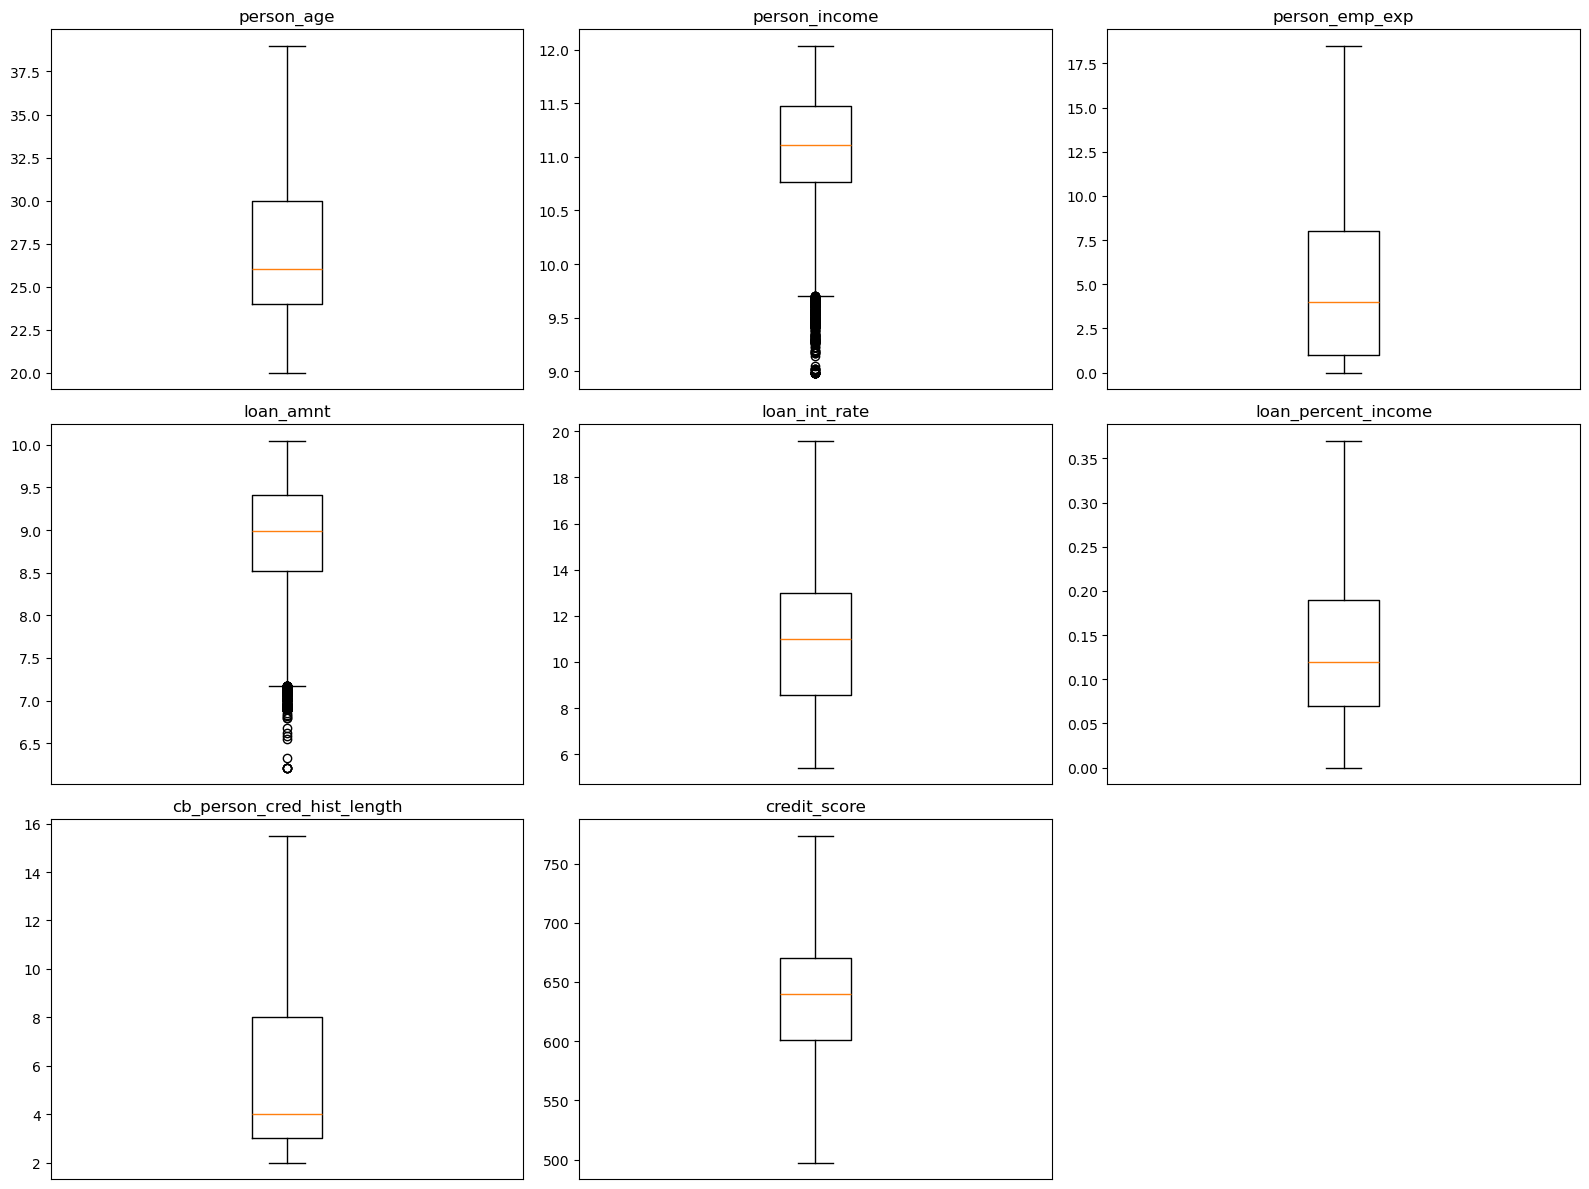

In [1089]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_clean[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [1090]:
df_clean.shape

(45000, 14)

In [1091]:
df_clean.to_csv('loan_data_clean.csv')

# Data Transform

## Label Encoding

In [1092]:
df_encoded = df_clean.copy()

In [1093]:
df_encoded

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,11.183699,0.0,RENT,10.047290,PERSONAL,16.02,0.37,3.0,561.0,No,1
1,21.0,female,High School,9.415890,0.0,OWN,6.907755,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,9.428512,3.0,MORTGAGE,8.612503,MEDICAL,12.87,0.37,3.0,635.0,No,1
3,23.0,female,Bachelor,11.286690,0.0,RENT,10.047290,MEDICAL,15.23,0.37,2.0,675.0,No,1
4,24.0,male,Master,11.099453,1.0,RENT,10.047290,MEDICAL,14.27,0.37,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,10.778352,6.0,RENT,9.615805,MEDICAL,15.66,0.31,3.0,645.0,No,1
44996,37.0,female,Associate,11.094375,17.0,RENT,9.104980,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1
44997,33.0,male,Associate,10.949788,7.0,RENT,7.926964,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,No,1
44998,29.0,male,Bachelor,10.409220,4.0,RENT,9.392662,EDUCATION,13.23,0.36,6.0,604.0,No,1


In [1094]:
label_col = ['previous_loan_defaults_on_file', 'person_education']
le = LabelEncoder()
for i in label_col :
    df_encoded[i] = le.fit_transform(df_encoded[i])

## One Hot Encoding

In [1095]:
ohe_cols = [
    'person_gender',
    'person_home_ownership',
    'loan_intent'
]

df_encoded = pd.get_dummies(df_encoded, columns=ohe_cols, drop_first=True)

In [1096]:
df_encoded.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,4,11.183699,0.0,10.047290,16.02,0.37,3.0,561.0,0,1,False,False,False,True,False,False,False,True,False
1,21.0,3,9.415890,0.0,6.907755,11.14,0.08,2.0,504.0,1,0,False,False,True,False,True,False,False,False,False
2,25.0,3,9.428512,3.0,8.612503,12.87,0.37,3.0,635.0,0,1,False,False,False,False,False,False,True,False,False
3,23.0,1,11.286690,0.0,10.047290,15.23,0.37,2.0,675.0,0,1,False,False,False,True,False,False,True,False,False
4,24.0,4,11.099453,1.0,10.047290,14.27,0.37,4.0,586.0,0,1,True,False,False,True,False,False,True,False,False


# Classification Model

## Features Engineering

In [1097]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

## Splitting Data

In [1098]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standarisasi Data

In [1099]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1100]:
# Regresi Logistik
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [1101]:
y_pred = lr.predict(X_test_scaled)

In [1102]:
print("Classification Report", classification_report(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.80      0.77      0.78      2000

    accuracy                           0.90      9000
   macro avg       0.87      0.85      0.86      9000
weighted avg       0.90      0.90      0.90      9000

